In [30]:
import layoutparser as lp
import cv2

In [31]:
image = cv2.imread("../data/0/0.jpg")
image = image[..., ::-1]

In [32]:
model = lp.AutoLayoutModel("lp://detectron2/PubLayNet/faster_rcnn_R_50_FPN_3x",
    extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
    label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

In [33]:
layout = model.detect(image)
print(layout)

Layout(_blocks=[], page_data={})


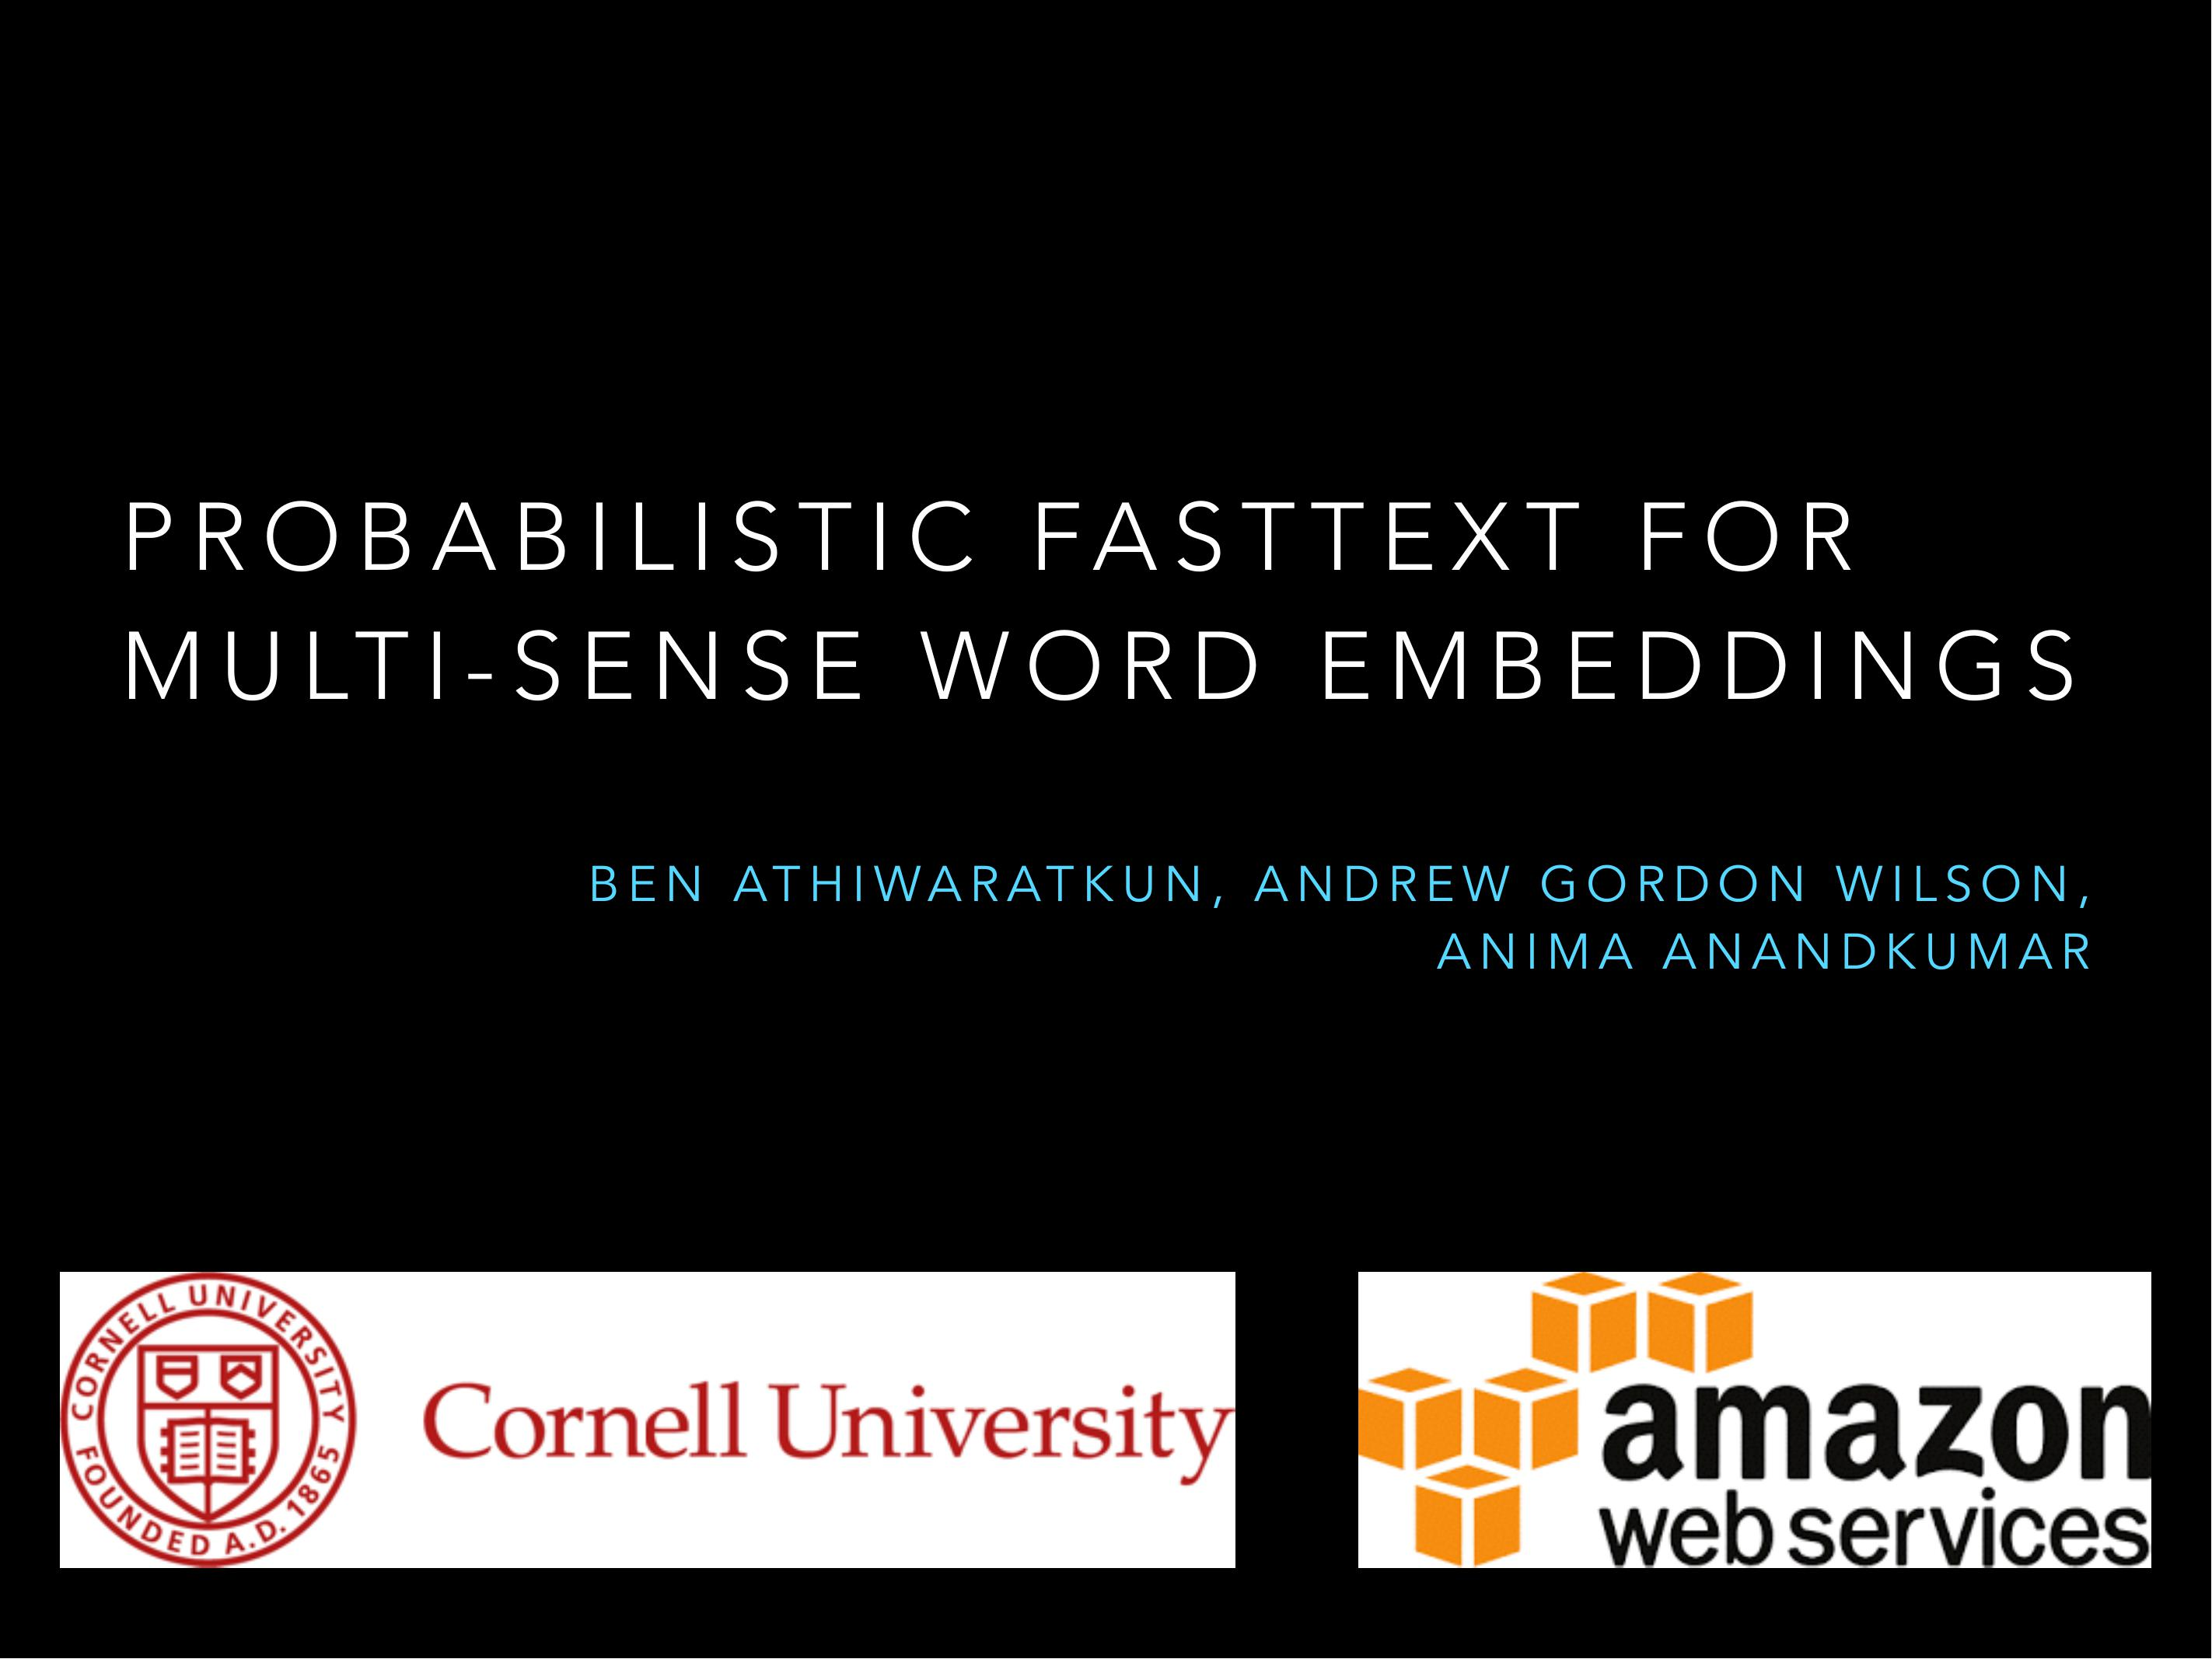

In [34]:
lp.draw_box(image, layout, box_width=3)

In [35]:
text_blocks = lp.Layout([b for b in layout if b.type=='Text'])
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [36]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

print(text_blocks, figure_blocks)

Layout(_blocks=[], page_data={}) Layout(_blocks=[], page_data={})


In [37]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

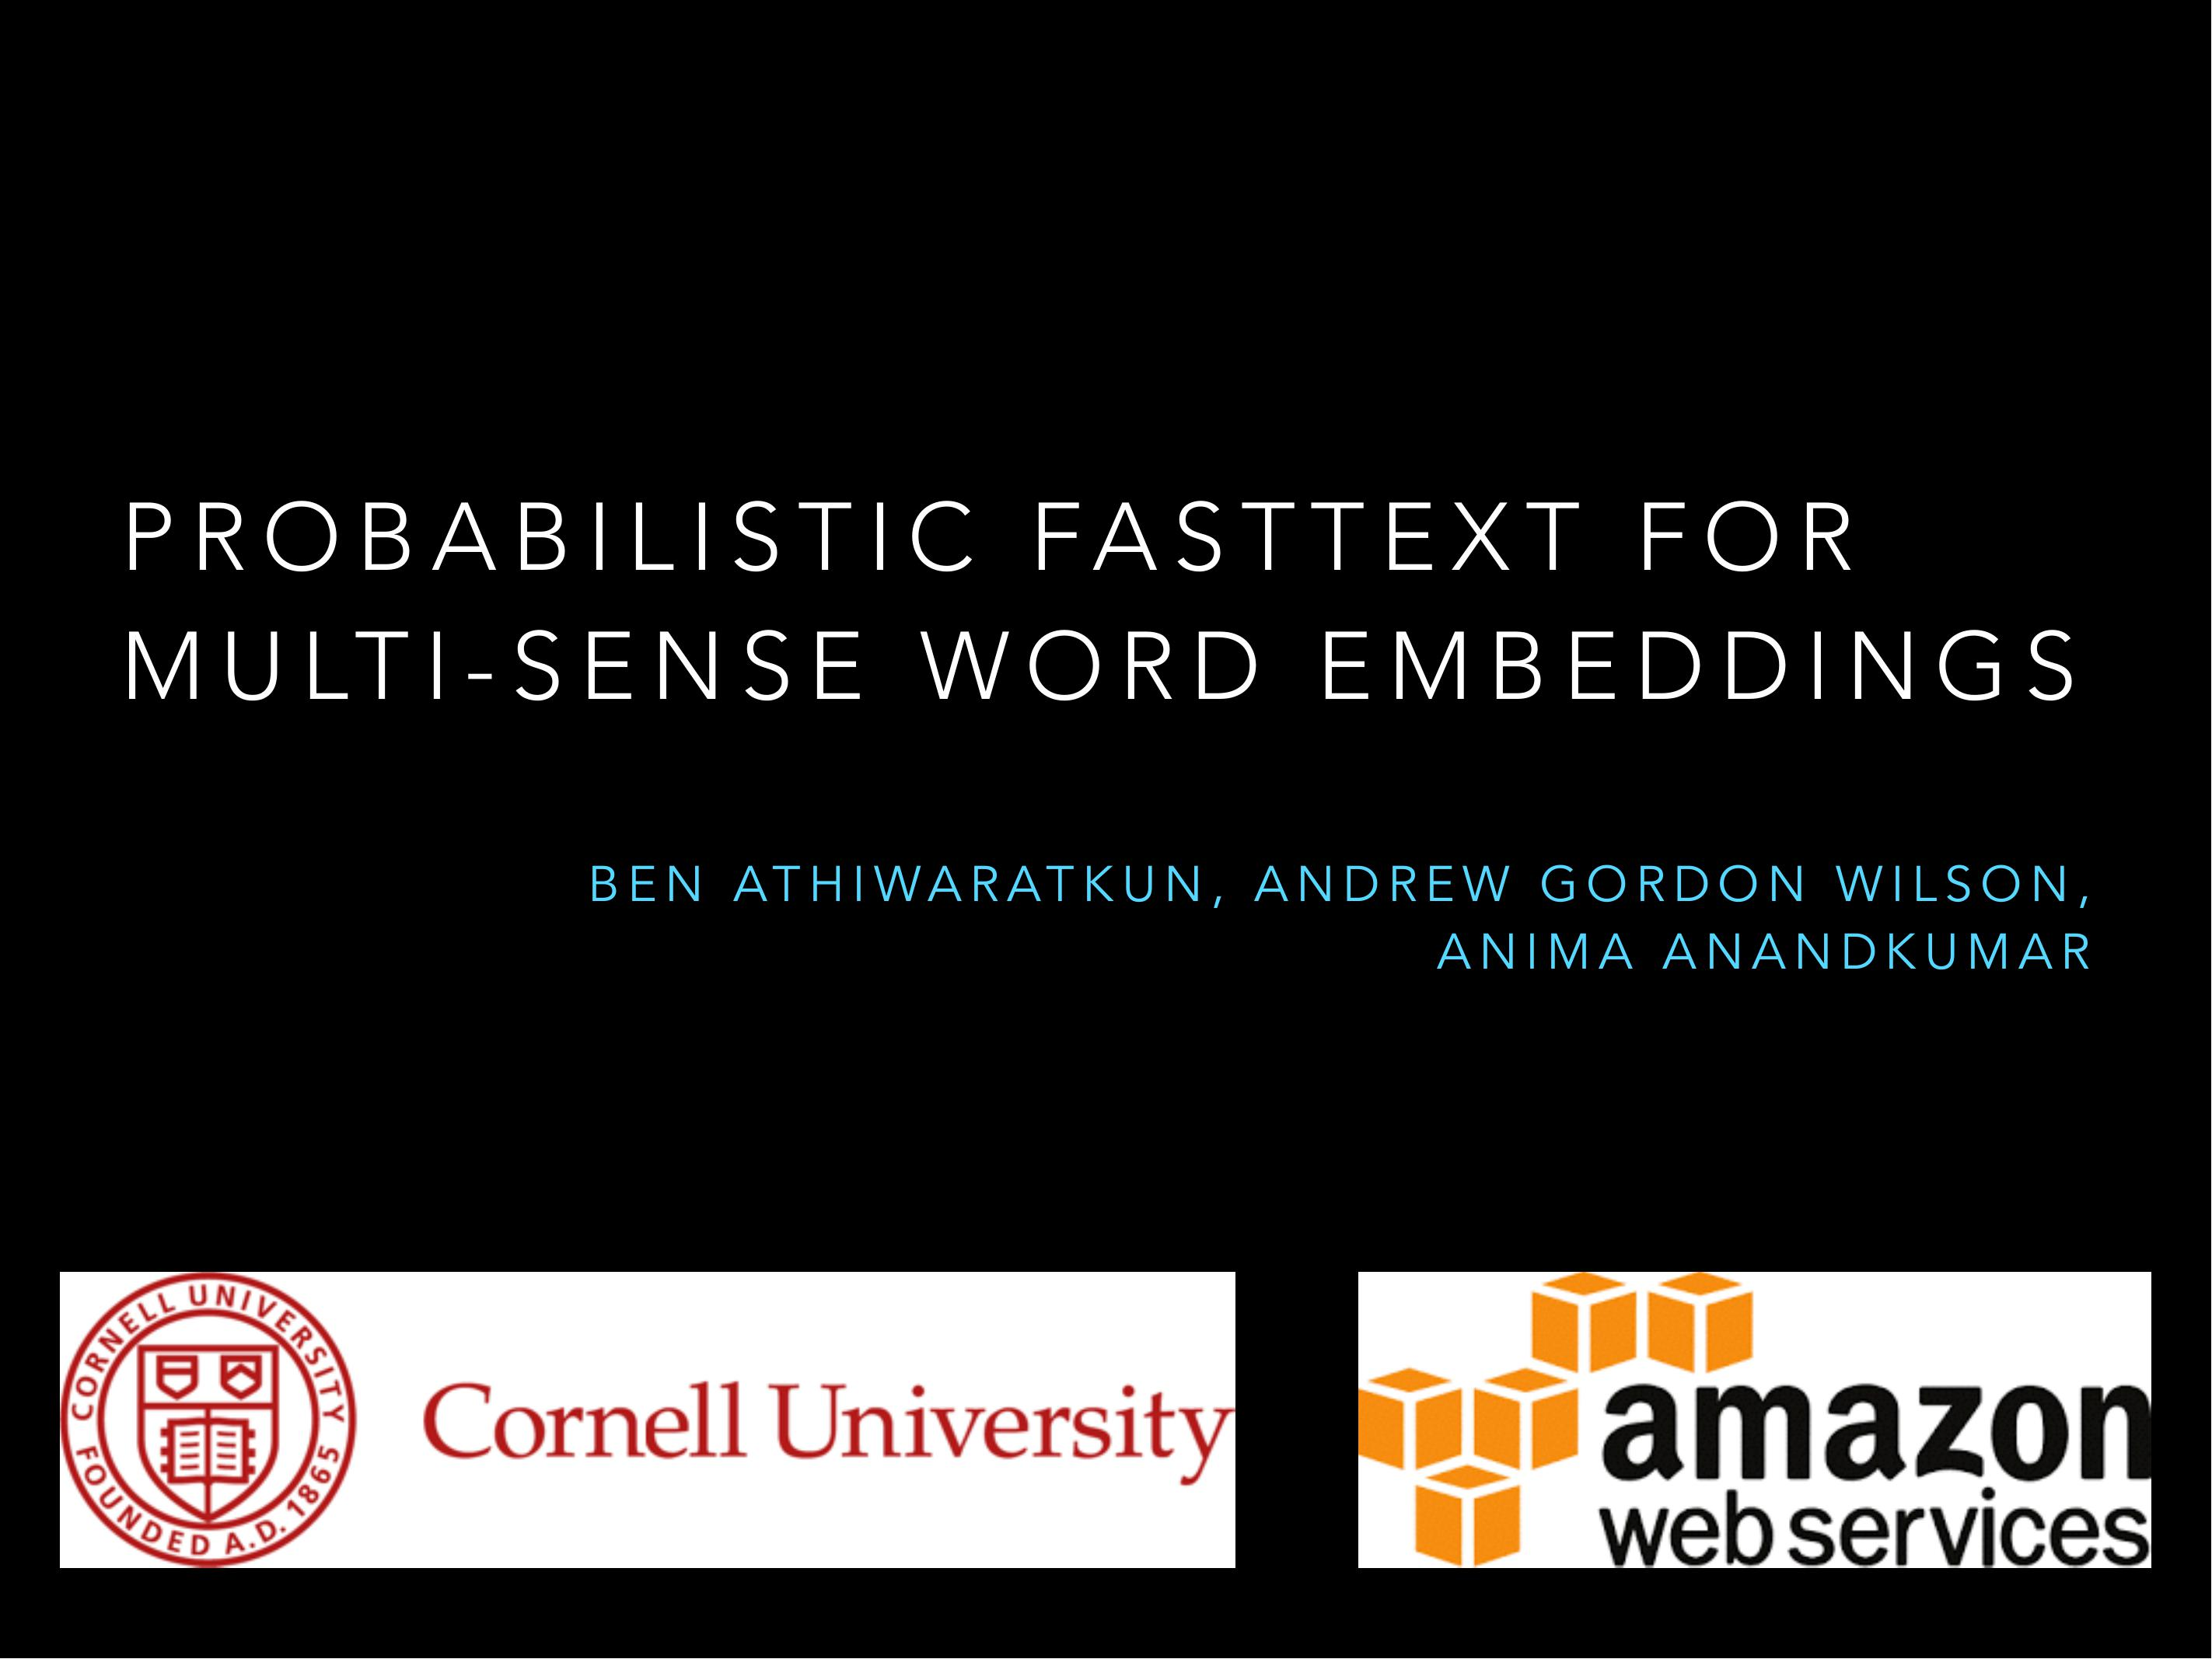

In [38]:
lp.draw_box(image, text_blocks,
            box_width=3, 
            show_element_id=True)